In [468]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [469]:
train_df = pd.read_csv('Train.csv')

In [470]:
item = train_df['Item_Identifier'].unique()

In [471]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [472]:
test_df = pd.read_csv('Test.csv')

In [473]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [474]:
test_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [475]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


C:\Users\anshul\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Item Outlet Sales Distribution')

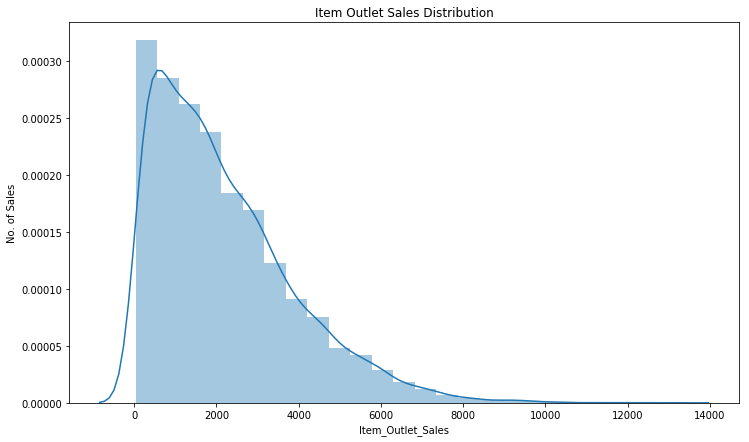

In [476]:
#Exploratory Data Analysis
#1.1 Univariate Analysis

plt.figure(figsize=(12,7))
sns.distplot(train_df.Item_Outlet_Sales , bins=25)
plt.ylabel('No. of Sales')
plt.title('Item Outlet Sales Distribution')

In [477]:
#1. Numeric Data
corr = train_df.corr()

In [478]:
corr['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

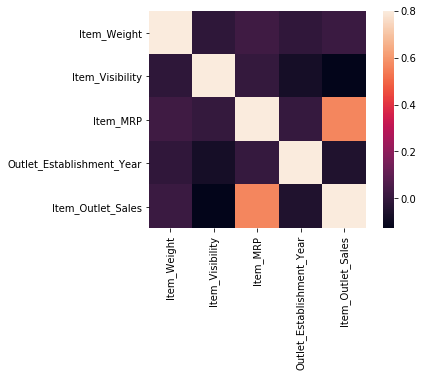

In [479]:
sns.heatmap(corr , vmax=.8 , square=True)

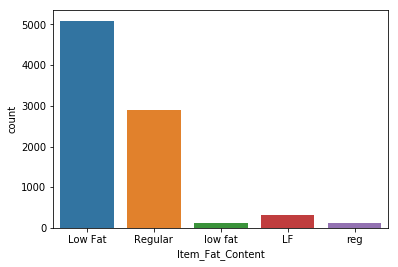

In [480]:
#2. Categorical Data
sns.countplot(train_df.Item_Fat_Content)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

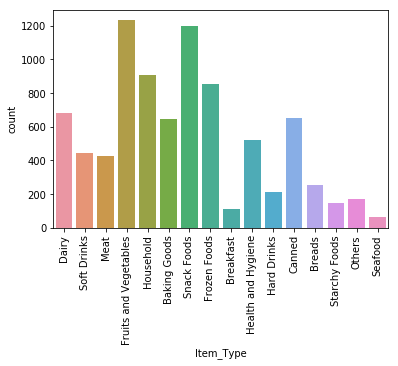

In [481]:
sns.countplot(train_df.Item_Type)
plt.xticks(rotation=90)

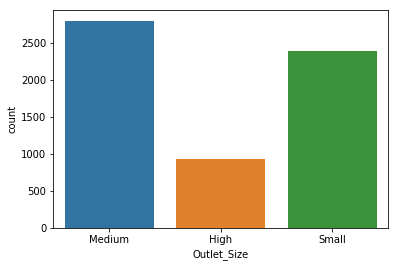

In [482]:
sns.countplot(train_df.Outlet_Size)

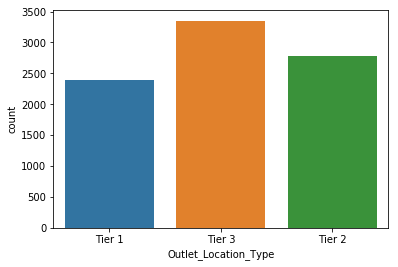

In [483]:
sns.countplot(train_df.Outlet_Location_Type)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

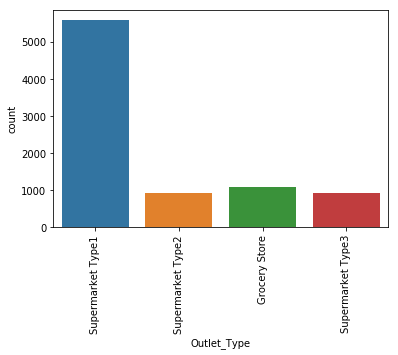

In [484]:
sns.countplot(train_df.Outlet_Type)
plt.xticks(rotation=90)

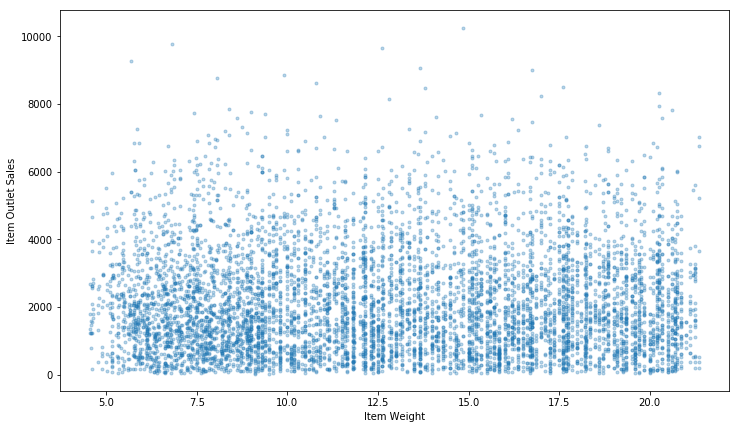

In [485]:
#1.2 Bivariate Analysis
plt.figure(figsize=(12,7))
plt.ylabel('Item Outlet Sales')
plt.xlabel('Item Weight')
plt.plot(train_df.Item_Weight , train_df.Item_Outlet_Sales , '.' , alpha=0.3)

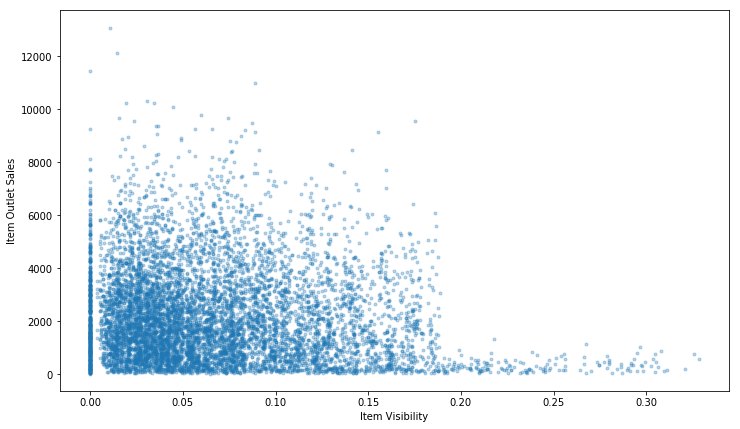

In [486]:
plt.figure(figsize=(12,7))
plt.ylabel('Item Outlet Sales')
plt.xlabel('Item Visibility')
plt.plot(train_df.Item_Visibility , train_df.Item_Outlet_Sales , '.' , alpha=0.3)

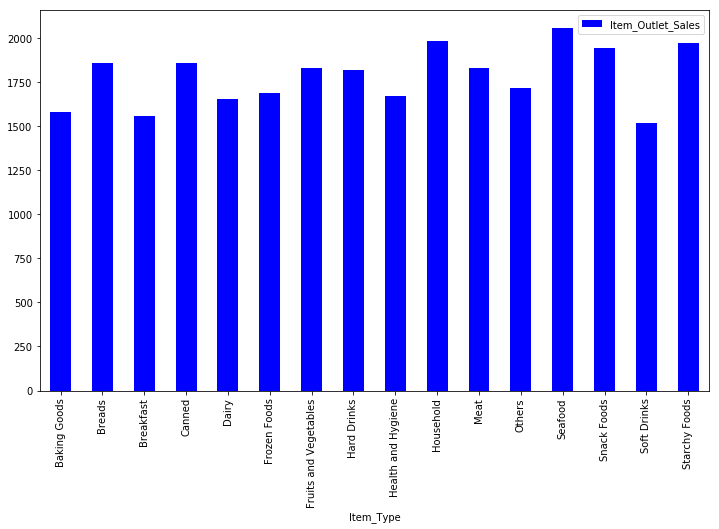

In [487]:
item_type_pivot = train_df.pivot_table(index='Item_Type' , values='Item_Outlet_Sales' , aggfunc=np.median)
item_type_pivot.plot(kind='bar' , color='blue' , figsize=(12,7))

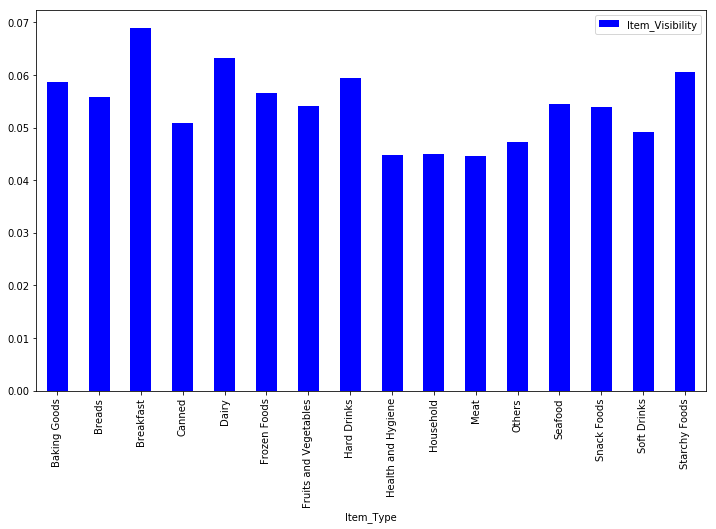

In [488]:
item_type_pivot = train_df.pivot_table(index='Item_Type' , values='Item_Visibility' , aggfunc=np.median)
item_type_pivot.plot(kind='bar' , color='blue' , figsize=(12,7))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

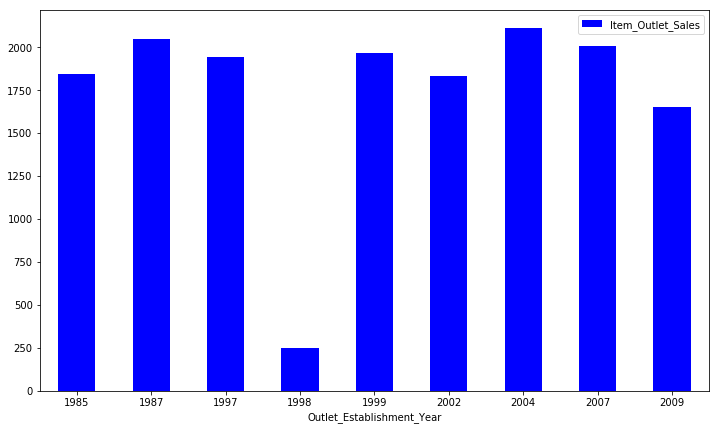

In [489]:
item_type_pivot = train_df.pivot_table(index='Outlet_Establishment_Year' , values='Item_Outlet_Sales' , aggfunc=np.median)
item_type_pivot.plot(kind='bar' , color='blue' , figsize=(12,7))
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

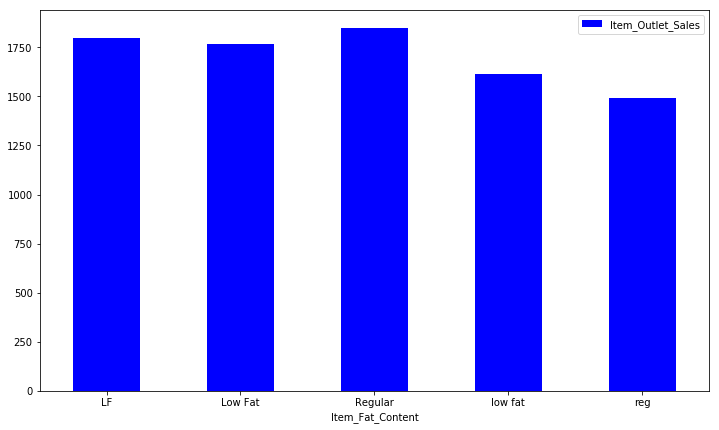

In [490]:
item_type_pivot = train_df.pivot_table(index='Item_Fat_Content' , values='Item_Outlet_Sales' , aggfunc=np.median)
item_type_pivot.plot(kind='bar' , color='blue' , figsize=(12,7))
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

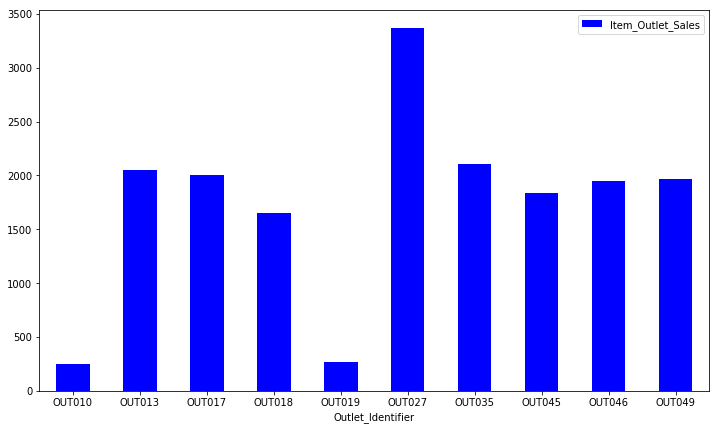

In [491]:
item_type_pivot = train_df.pivot_table(index='Outlet_Identifier' , values='Item_Outlet_Sales' , aggfunc=np.median)
item_type_pivot.plot(kind='bar' , color='blue' , figsize=(12,7))
plt.xticks(rotation=0)

In [492]:
train_df.pivot_table(values='Outlet_Type' , columns='Outlet_Identifier' , aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [493]:
train_df.pivot_table(values='Outlet_Type' , columns='Outlet_Size' , aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

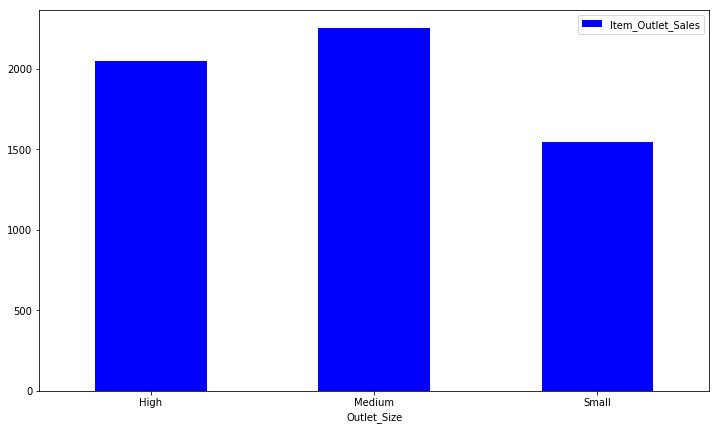

In [494]:
item_type_pivot = train_df.pivot_table(index='Outlet_Size' , values='Item_Outlet_Sales' , aggfunc=np.median)
item_type_pivot.plot(kind='bar' , color='blue' , figsize=(12,7))
plt.xticks(rotation=0)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

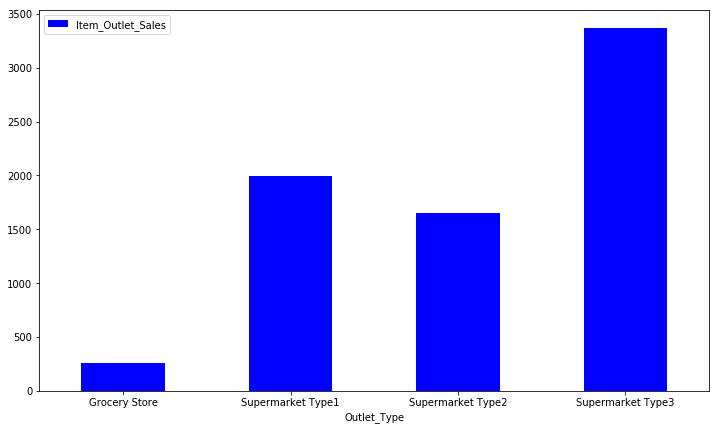

In [495]:
item_type_pivot = train_df.pivot_table(index='Outlet_Type' , values='Item_Outlet_Sales' , aggfunc=np.median)
item_type_pivot.plot(kind='bar' , color='blue' , figsize=(12,7))
plt.xticks(rotation=0)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

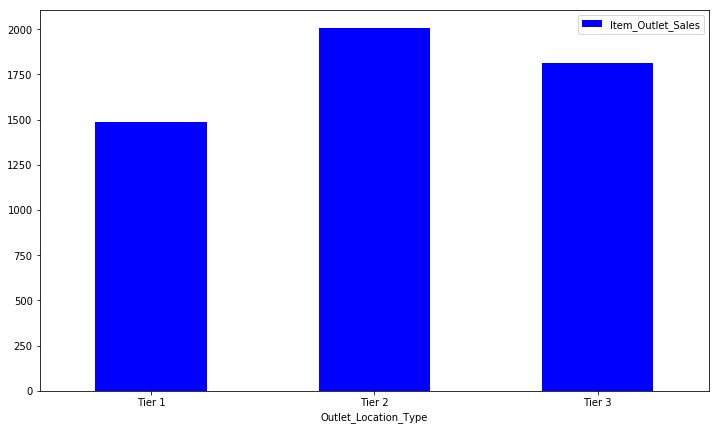

In [496]:
item_type_pivot = train_df.pivot_table(index='Outlet_Location_Type' , values='Item_Outlet_Sales' , aggfunc=np.median)
item_type_pivot.plot(kind='bar' , color='blue' , figsize=(12,7))
plt.xticks(rotation=0)

In [497]:
train_df.pivot_table(values='Outlet_Location_Type' , columns='Outlet_Type' , aggfunc=lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


In [498]:
#2.Data Pre-Processing
train_df['source'] = 'train'
test_df['source'] = 'test'

In [499]:
data = pd.concat([train_df , test_df] , ignore_index=True)

C:\Users\anshul\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [500]:
train_df.shape

(8523, 13)

In [501]:
test_df.shape

(5681, 12)

In [502]:
data.shape

(14204, 13)

In [503]:
data.isnull().sum() / data.shape[0] * 100

Item_Fat_Content              0.000000
Item_Identifier               0.000000
Item_MRP                      0.000000
Item_Outlet_Sales            39.995776
Item_Type                     0.000000
Item_Visibility               0.000000
Item_Weight                  17.171219
Outlet_Establishment_Year     0.000000
Outlet_Identifier             0.000000
Outlet_Location_Type          0.000000
Outlet_Size                  28.273726
Outlet_Type                   0.000000
source                        0.000000
dtype: float64

In [504]:
#Imputing Missing values

In [505]:
item_avg_weight = data.pivot_table(values='Item_Weight' , index='Item_Identifier')
#item_avg_weight = item_avg_weight.reset_index()

In [506]:
item_avg_weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
DRB24,8.785
DRB25,12.300
DRB48,16.750
DRC01,5.920


In [507]:
def impute_weight(col):
    weight = col[0]
    identifier = col[1]
    
    if pd.isnull(weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index == identifier]
    
    else :
        return weight

In [508]:
data['Item_Weight'] = data[['Item_Weight' , 'Item_Identifier']].apply(impute_weight,axis=1)

In [509]:
outlet_size_mode = data.pivot_table(values='Outlet_Size' , columns='Outlet_Type' , aggfunc=lambda x:x.mode())

In [510]:
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [511]:
def impute_size(col):
    size = col[0]
    Type = col[1]
    
    if pd.isnull(size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    
    else :
        return size

In [512]:
data['Outlet_Size'] = data[['Outlet_Size' , 'Outlet_Type']].apply(impute_size , axis=1)

In [513]:
#3. Feature Engineering
data.pivot_table(values='Item_Outlet_Sales' , columns='Outlet_Type')

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Outlet_Sales,339.8285,2316.181148,1995.498739,3694.038558


In [514]:
visi_item_avg = data.pivot_table(values='Item_Visibility' , index='Item_Identifier')

In [515]:
def impute_visi(col):
    vis = col[0]
    index = col[1]
    
    if pd.isnull(vis):
        return visi_item_avg['Item_Visibility'][visi_item_avg.index == index]
    
    else:
        return vis

In [516]:
data['Item_Visibility'] = data[['Item_Visibility' , 'Item_Identifier']].apply(impute_visi , axis=1)

In [517]:
data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [518]:
data['Outlet_Years'] = 2013 - data.Outlet_Establishment_Year

In [519]:
data.Outlet_Years.describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [520]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x:x[0:2])

In [521]:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD' : 'Food' , 'NC' : 'Non-Consumable' , 'DR':'Drinks'})

In [522]:
data.Item_Type_Combined.value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [523]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].map({'LF':'Low Fat' , 'reg' : 'Regular' , 'low fat' : 'Low Fat' , 'Low Fat' : 'Low Fat' , 'Regular' : 'Regular'})

In [524]:
data.loc[data['Item_Type_Combined'] == "Non-Consumable" , 'Item_Fat_Content'] = "Non-Edible"

In [525]:
data.Item_Fat_Content.value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [526]:
#4. Feature Transformations
func = lambda x: x['Item_Visibility'] / visi_item_avg['Item_Visibility'][visi_item_avg.index == x['Item_Identifier']][0]

In [527]:
data['Item_Visibility_MeanRatio'] = data.apply(func , axis=1).astype(float)

In [528]:
data['Item_Visibility_MeanRatio'].describe()

count    14204.000000
mean         1.000000
std          0.348382
min          0.000000
25%          0.921522
50%          0.962037
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

In [529]:
#Categorical - One Hot Encoding

In [530]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [531]:
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])

In [532]:
var_mod = ['Item_Fat_Content' , 'Outlet_Location_Type' , 'Outlet_Size' , 'Item_Type_Combined' , 'Outlet_Type' , 'Outlet' ]

In [533]:
for i in var_mod:
    data[i] = le.fit_transform(data[i])

#Dummy Variables:
data = pd.get_dummies(data , columns=var_mod)

In [534]:
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                   object
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Outlet_Years                   int64
Item_Visibility_MeanRatio    float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
O

In [535]:
data.drop(['Item_Type' , 'Outlet_Establishment_Year'] , axis=1 , inplace=True)

In [536]:
train = data.loc[data['source'] == 'train']

In [537]:
test = data.loc[data['source'] == 'test']

In [539]:
test.drop(['Item_Outlet_Sales' , 'source'] , axis=1 , inplace=True)

C:\Users\anshul\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [540]:
train.drop('source' , axis=1 , inplace=True)

C:\Users\anshul\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [541]:
target = 'Item_Outlet_Sales'

In [542]:
IDcol = ['Item_Identifier' , 'Outlet_Identifier']

In [543]:
from sklearn import cross_validation , metrics

In [549]:
def modelfit(algo , dtrain , dtest , predictors , target , IDcol):
    algo.fit(dtrain[predictors] , dtrain[target])
    dtrain_predictions = algo.predict(dtrain[predictors])
    
    Sq_train = (dtrain[target]) ** 2
    cv_score = cross_validation.cross_val_score(algo , dtrain[predictors] , Sq_train , cv=20 , scoring='neg_mean_squared_error')
    
    cv_score = np.sqrt(np.abs(cv_score))
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(Sq_train.values, dtrain_predictions)))
    
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    dtest[target] = algo.predict(dtest[predictors])

In [550]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)
predictors = train.columns.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])
modelfit(LR, train, test, predictors, target, IDcol)


Model Report
RMSE : 1.4e+07
CV Score : Mean - 9.125e+06 | Std - 1.029e+06 | Min - 7.77e+06 | Max - 1.172e+07


C:\Users\anshul\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
